In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset?select=Covid-19+Twitter+Dataset+%28Aug-Sep+2020%29.csv
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Covid19/Covid-19(Apr-Jun 2020).csv')
df = df.drop_duplicates()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143903 entries, 0 to 143902
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               143901 non-null  float64
 1   created_at       143902 non-null  object 
 2   source           143876 non-null  object 
 3   original_text    143902 non-null  object 
 4   lang             143902 non-null  object 
 5   favorite_count   143902 non-null  float64
 6   retweet_count    143902 non-null  float64
 7   original_author  143902 non-null  object 
 8   hashtags         28510 non-null   object 
 9   user_mentions    107332 non-null  object 
 10  place            105021 non-null  object 
 11  clean_tweet      143419 non-null  object 
 12  compound         143903 non-null  float64
 13  neg              143903 non-null  float64
 14  neu              143903 non-null  float64
 15  pos              143903 non-null  float64
 16  sentiment        143903 non-null  obje

In [2]:
df=df[['original_text','sentiment']]
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143902 entries, 0 to 143902
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   original_text  143902 non-null  object
 1   sentiment      143902 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


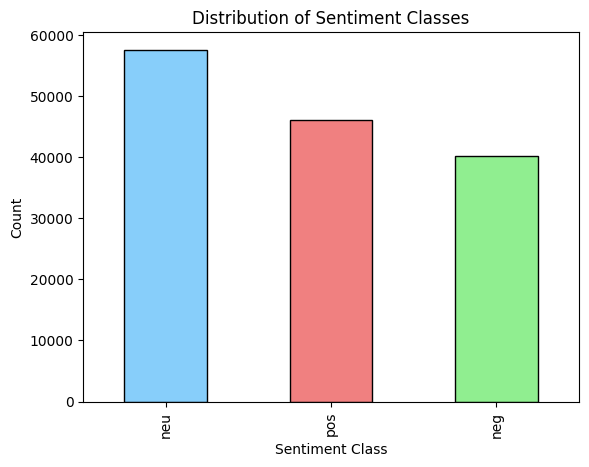

In [7]:
import matplotlib.pyplot as plt

# Count sentiment classes
sentiment_counts = df["sentiment"].value_counts()

# Define colors for "blue light," "red light," and "green light"
colors = ["lightskyblue", "lightcoral", "lightgreen"]  # Light blue, light red, light green

# Plot
sentiment_counts.plot(kind="bar", color=colors, edgecolor="black")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Classes")
plt.show()


In [8]:
df["text_length"] = df["original_text"].apply(lambda x: len(x.split()))
print(df["text_length"].describe())


count    143902.000000
mean         19.161902
std           4.571431
min           1.000000
25%          17.000000
50%          20.000000
75%          22.000000
max          33.000000
Name: text_length, dtype: float64


In [3]:
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import seaborn as sns
import matplotlib as plt
from transformers import AutoModel, BertTokenizerFast
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [4]:
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import pandas as pd
import numpy as np
from wordcloud import WordCloud
string.punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')
# Initialize stop words, English words corpus, and stemmer
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
# stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()

    text = re.sub(r"@\w+", "", text)

    text = re.sub(r"#(\w+)", r"\1", text)

    text = re.sub(r"http\S+|www\S+", "", text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = ''.join([i for i in text if not i.isdigit()])

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

df['Cleantext'] = df['original_text'].apply(preprocess)



In [6]:
X=df.Cleantext
Y=df.sentiment
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

# Further split temp into test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
print(f'(X_train: {len(X_train)}\nx_val: {len(X_val)}\nx_test: {len(X_test)})')

(X_train: 115121
x_val: 14391
x_test: 14390)


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder only on training labels
label_encoder.fit(y_train)

# Transform both training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

In [8]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()
y_val=y_val.tolist()
X_val=X_val.tolist()


In [ ]:
y_val

In [10]:
from transformers import AutoTokenizer, BertModel
tokenizer = AutoTokenizer.from_pretrained('FacebookAI/xlm-roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [11]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=50)
valid_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=50)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=50)


In [12]:
class DATALOADER(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])  # No need to wrap in a list
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = DATALOADER(train_encodings, y_train_encoded)
valid_dataset = DATALOADER(valid_encodings, y_val_encoded)
test_dataset = DATALOADER(test_encodings, y_test_encoded)

In [13]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_recall_fscore_support,
    matthews_corrcoef, confusion_matrix
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Accuracy
    acc = accuracy_score(labels, preds)

    # Precision, Recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")

    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(labels, preds)



    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "matthews_corrcoef": mcc,
    }


In [14]:
from transformers import AutoModelForSequenceClassification, AutoConfig

id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}  # Map index to label

label2id = {label: idx for idx, label in id2label.items()}

# Load and update the configuration
config = AutoConfig.from_pretrained("FacebookAI/xlm-roberta-base")
config.id2label = id2label
config.label2id = label2id
config.num_labels = 3

# Load model with custom config
model = AutoModelForSequenceClassification.from_pretrained("FacebookAI/xlm-roberta-base", config=config)



Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir='./bert',
    num_train_epochs=10,
    fp16=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=8,
    warmup_ratio=0.1,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=200,
    save_steps=500,  # Must be a multiple of eval_steps
    eval_steps=500,  # Ensure it's aligned with save_steps
    eval_strategy="steps",
    save_total_limit=2,
    learning_rate=3e-5,
    lr_scheduler_type="cosine",
    report_to=None
)


In [16]:
from transformers import  Trainer
from transformers import EarlyStoppingCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

In [17]:
import os
os.environ["WANDB_SILENT"] = "true"
os.environ["WANDB_MODE"] = "disabled"
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_API_KEY"] = ""  # Clear any stored API key


In [18]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score,Matthews Corrcoef
500,0.691200,0.371107,0.872629,0.873291,0.872629,0.872241,0.807337
1000,0.237900,0.189660,0.943576,0.943526,0.943576,0.943538,0.914351
1500,0.164300,0.144366,0.959905,0.959942,0.959905,0.959850,0.939160
2000,0.124900,0.135613,0.963310,0.963719,0.963310,0.963342,0.944523
2500,0.115100,0.116784,0.968591,0.968607,0.968591,0.968580,0.952339
3000,0.094800,0.111804,0.969912,0.969968,0.969912,0.969929,0.954364
3500,0.090600,0.112797,0.971996,0.972037,0.971996,0.972012,0.957526
4000,0.070700,0.106809,0.971371,0.971396,0.971371,0.971374,0.956562
4500,0.066500,0.111748,0.974428,0.974485,0.974428,0.974446,0.961225
5000,0.051300,0.122298,0.974151,0.974310,0.974151,0.974183,0.960851


TrainOutput(global_step=5500, training_loss=0.176936747637662, metrics={'train_runtime': 5781.778, 'train_samples_per_second': 199.11, 'train_steps_per_second': 1.555, 'total_flos': 1.80915141570912e+16, 'train_loss': 0.176936747637662, 'epoch': 6.117843246247915})

In [19]:
trainer.evaluate()

{'eval_loss': 0.10680880397558212,
 'eval_accuracy': 0.9713709957612396,
 'eval_precision': 0.9713963441222679,
 'eval_recall': 0.9713709957612396,
 'eval_f1_score': 0.97137437559306,
 'eval_matthews_corrcoef': 0.9565622512904676,
 'eval_runtime': 27.4839,
 'eval_samples_per_second': 523.616,
 'eval_steps_per_second': 32.746,
 'epoch': 6.117843246247915}

In [20]:
eval_results =trainer.evaluate(test_dataset)

# Predict on the evaluation dataset to get logits
predictions = trainer.predict(test_dataset)
eval_results

{'eval_loss': 0.10986983776092529,
 'eval_accuracy': 0.9692842251563586,
 'eval_precision': 0.9693920327828972,
 'eval_recall': 0.9692842251563586,
 'eval_f1_score': 0.9692988356500636,
 'eval_matthews_corrcoef': 0.9535113584813666,
 'eval_runtime': 29.5177,
 'eval_samples_per_second': 487.504,
 'eval_steps_per_second': 30.49,
 'epoch': 6.117843246247915}